In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("manufacturing_dataset_1000_samples.csv")
# Display basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   1000 non-null   object 
 1   Injection_Temperature       1000 non-null   float64
 2   Injection_Pressure          1000 non-null   float64
 3   Cycle_Time                  1000 non-null   float64
 4   Cooling_Time                1000 non-null   float64
 5   Material_Viscosity          980 non-null    float64
 6   Ambient_Temperature         980 non-null    float64
 7   Machine_Age                 1000 non-null   float64
 8   Operator_Experience         980 non-null    float64
 9   Maintenance_Hours           1000 non-null   int64  
 10  Shift                       1000 non-null   object 
 11  Machine_Type                1000 non-null   object 
 12  Material_Grade              1000 non-null   object 
 13  Day_of_Week                 1000 n

Shape of dataset: (1000, 19)

Data Types:
 Timestamp                      object
Injection_Temperature         float64
Injection_Pressure            float64
Cycle_Time                    float64
Cooling_Time                  float64
Material_Viscosity            float64
Ambient_Temperature           float64
Machine_Age                   float64
Operator_Experience           float64
Maintenance_Hours               int64
Shift                          object
Machine_Type                   object
Material_Grade                 object
Day_of_Week                    object
Temperature_Pressure_Ratio    float64
Total_Cycle_Time              float64
Efficiency_Score              float64
Machine_Utilization           float64
Parts_Per_Hour                float64
dtype: object

Summary Statistics:
        Injection_Temperature  Injection_Pressure  Cycle_Time  Cooling_Time  \
count            1000.000000         1000.000000  1000.00000    1000.00000   
mean              215.315900          116.0

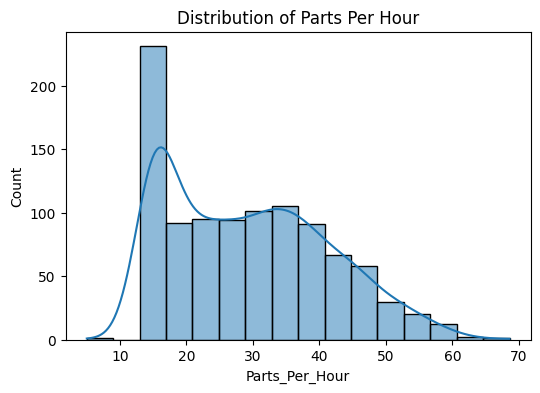

In [39]:
#Step 2: Data Exploration and Understanding
# Dataset Shape
print("Shape of dataset:", df.shape)

# Data types
print("\nData Types:\n", df.dtypes)

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Target Variable Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.histplot(df['Parts_Per_Hour'], kde=True)# kernal density estimation
plt.title('Distribution of Parts Per Hour')
plt.show()


In [40]:
# Split back into features and target
X = df.drop(columns=['Parts_Per_Hour'])
y = df['Parts_Per_Hour']

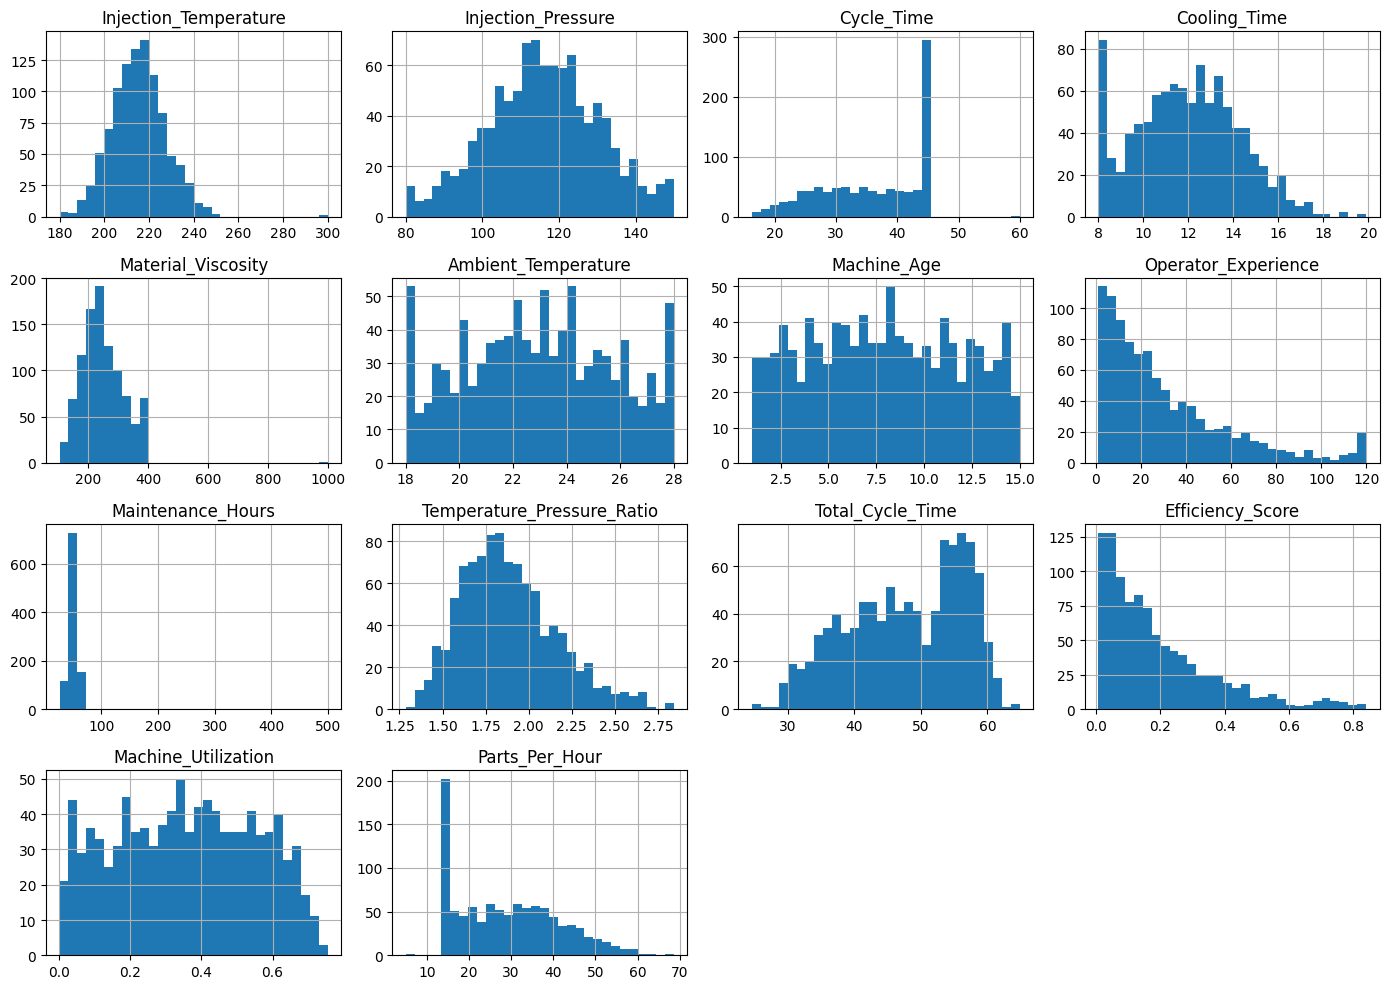

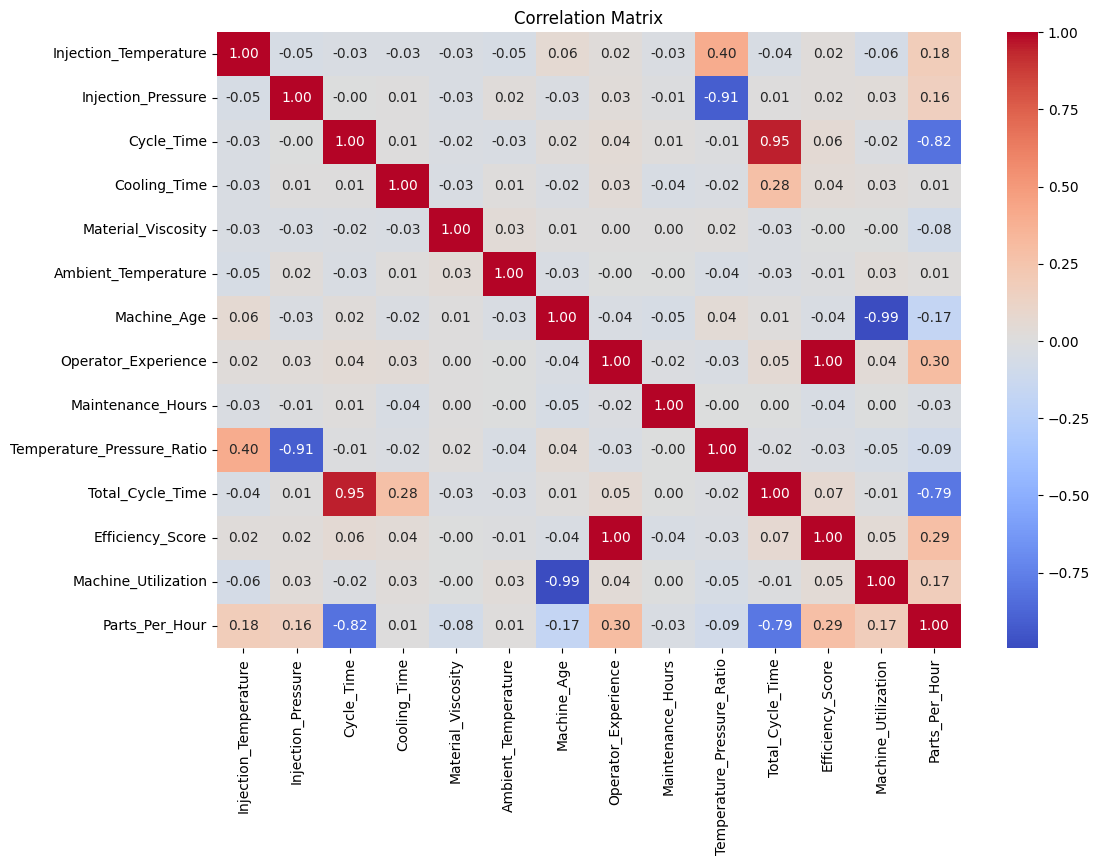

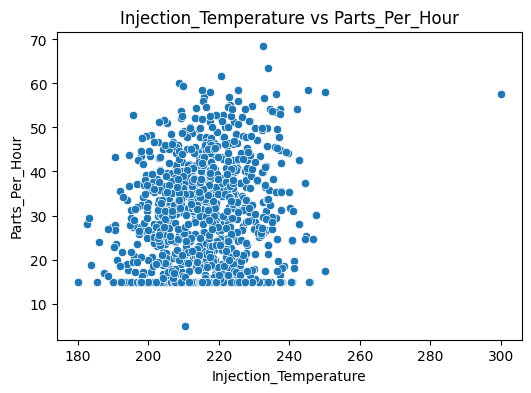

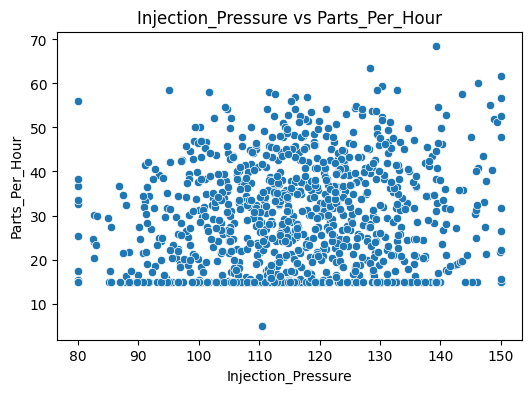

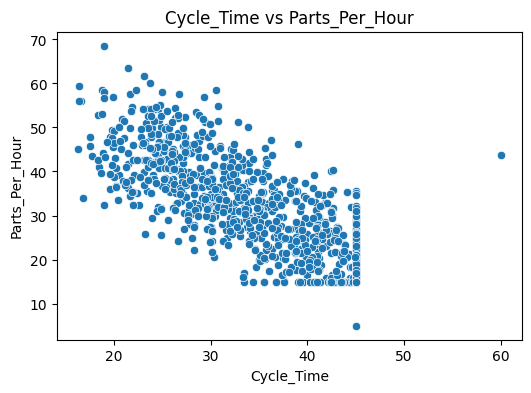

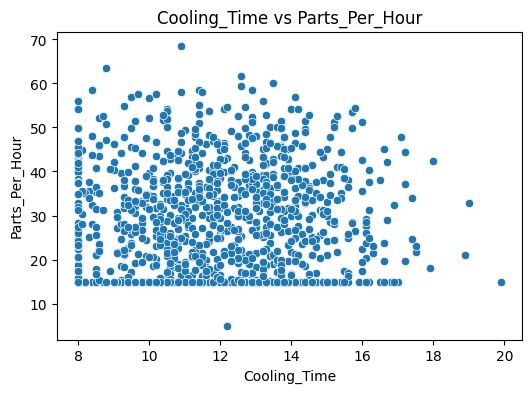

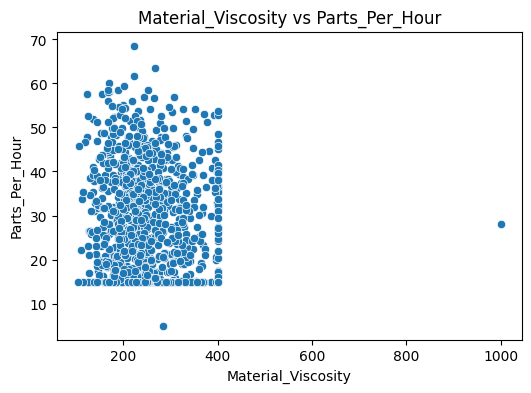

In [41]:
# Histogram for all features
df.hist(bins=30, figsize=(14, 10))
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Scatter plots between key variables and target
key_features = ['Injection_Temperature', 'Injection_Pressure', 'Cycle_Time', 'Cooling_Time', 'Material_Viscosity']
for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['Parts_Per_Hour'])
    plt.title(f'{feature} vs Parts_Per_Hour')
    plt.show()


In [42]:
#Step 4: Data Preprocessing and Feature Engineering
# Handle outliers using IQR for key features
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]

columns_to_check = ['Injection_Temperature', 'Injection_Pressure', 'Cycle_Time', 'Cooling_Time', 'Material_Viscosity', 'Parts_Per_Hour']
for col in columns_to_check:
    df = remove_outliers_iqr(df, col)

# Drop non-numeric columns for modeling
X = df.drop(columns=['Parts_Per_Hour', 'Timestamp', 'Machine_Type', 'Material_Grade', 'Day_of_Week', 'Shift'])

# Target
y = df['Parts_Per_Hour']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Options: 'mean', 'median', 'most_frequent'

X_train_imputed = imputer.fit_transform(X_train)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_imputed, y_train)


LinearRegression()

In [44]:
#X_train = X_train.dropna()
#y_train = y_train.loc[X_train.index]  # Keep corresponding target values

#model.fit(X_train, y_train)


In [45]:
#Step 5:Model Building and Training

from sklearn.preprocessing import StandardScaler

# Combine X and y temporarily to drop rows with NaNs in either
data = pd.concat([X, y], axis=1)
data = data.dropna()

# Split back into features and target
X = data.drop(columns=['Parts_Per_Hour'])
y = data['Parts_Per_Hour']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_train.columns.tolist())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

['Injection_Temperature', 'Injection_Pressure', 'Cycle_Time', 'Cooling_Time', 'Material_Viscosity', 'Ambient_Temperature', 'Machine_Age', 'Operator_Experience', 'Maintenance_Hours', 'Temperature_Pressure_Ratio', 'Total_Cycle_Time', 'Efficiency_Score', 'Machine_Utilization']


In [46]:

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

📊 Train R² Score: 0.8868556550192856
Train MSE: 16.052851959458337
Train RMSE: 4.00660104820262
Train MAE: 3.204510117530364
📊 Test R² Score: 0.8421043373449764
Test MSE: 22.651642437541042
Test RMSE: 4.759374164482242
Test MAE: 3.7941738847609074


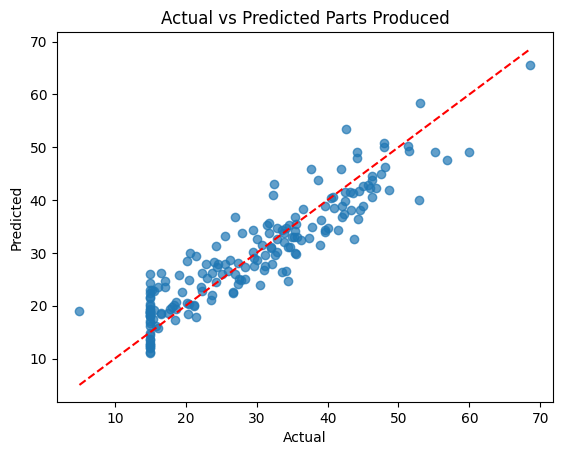

In [47]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np
def evaluate_model(y_true, y_pred, label="Test"):
    print(f"📊 {label} R² Score:", r2_score(y_true, y_pred))
    print(f"{label} MSE:", mean_squared_error(y_true, y_pred))
    print(f"{label} RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print(f"{label} MAE:", mean_absolute_error(y_true, y_pred))

evaluate_model(y_train, y_train_pred, label="Train")
evaluate_model(y_test, y_test_pred, label="Test")

# Plot: Predicted vs Actual
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Parts Produced")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.show()

In [48]:
#Step7: Model Evaluation and Interpretation

# Feature coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coeff_df)

# Business interpretation:
# Larger absolute coefficients => stronger impact on output.


                       Feature  Coefficient
11            Efficiency_Score    12.267895
12         Machine_Utilization    11.679506
9   Temperature_Pressure_Ratio    -4.474602
3                 Cooling_Time     1.287872
10            Total_Cycle_Time    -1.239922
0        Injection_Temperature     0.202640
6                  Machine_Age     0.102210
7          Operator_Experience     0.064039
5          Ambient_Temperature    -0.062336
1           Injection_Pressure     0.045986
2                   Cycle_Time     0.040774
4           Material_Viscosity    -0.015686
8            Maintenance_Hours    -0.008836


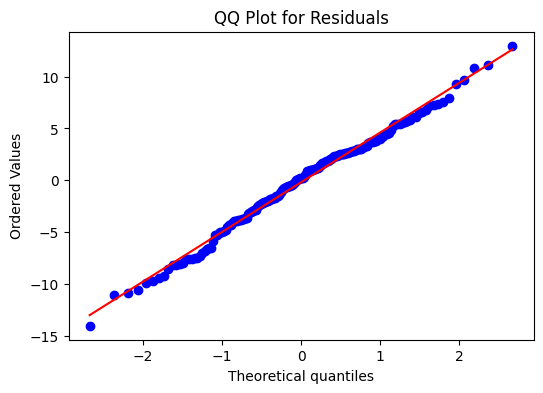

In [49]:
#Step9: Model Diagnostics and Validation

import scipy.stats as stats

# Check normality of residuals
residuals = y_test - y_test_pred
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot for Residuals')
plt.show()

# Homoscedasticity Check (already done with residual plot)

# Linearity Check (Actual vs Predicted plot already done)

# Independence: Not explicitly checked here, assumes independent sampling.


In [50]:
#step10: Model Saving and Deployment

import pickle

# Save model
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as linear_regression_model.pkl")

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

print("Model saved as scaler.pkl.pkl")

with open("feature_columns.json", "r") as f:
    import json
    feature_columns = json.load(f)


Model saved as linear_regression_model.pkl
Model saved as scaler.pkl.pkl


C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
